<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/Moscow_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('Moscow Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [94]:
df.isnull().sum()

,0
Price,0
Apartment type,0
Metro station,0
Minutes to metro,0
Region,0
Number of rooms,0
Area,0
Living area,0
Kitchen area,0
Floor,0


In [74]:
df['Renovation'].unique()

array(['Cosmetic', 'European-style renovation', 'Without renovation',
       'Designer'], dtype=object)

In [75]:
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [76]:
features = ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area','Kitchen area', 'Floor', 'Number of floors']
data = features.copy()
features

['Price',
 'Minutes to metro',
 'Number of rooms',
 'Area',
 'Living area',
 'Kitchen area',
 'Floor',
 'Number of floors']

In [77]:
df['Renovation'].value_counts().index

Index(['Cosmetic', 'European-style renovation', 'Without renovation',
       'Designer'],
      dtype='object', name='Renovation')

([<matplotlib.patches.Wedge at 0x78aa36ff1510>,
 [Text(-1.0778789960617785, -0.21949230020402202, 'Cosmetic'),
  Text(0.8682319641305172, -0.6754059938008135, 'European-style renovation'),
  Text(1.0541213216261736, 0.31436959028043654, 'Without renovation'),
  Text(0.4474844675146747, 1.0048669819100975, 'Designer')],
 [Text(-0.5879339978518792, -0.11972307283855746, '56.4%'),
  Text(0.4735810713439184, -0.3684032693458982, '16.2%'),
  Text(0.5749752663415492, 0.1714743219711472, '14.1%'),
  Text(0.24408243682618616, 0.5481092628600531, '13.3%')])

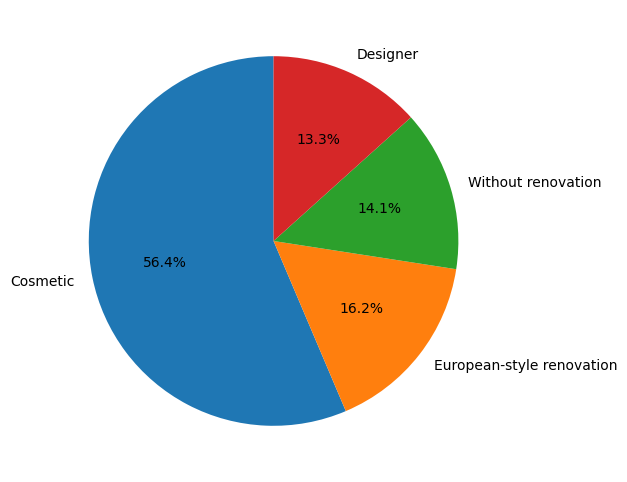

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.pie(df['Renovation'].value_counts(),labels=df['Renovation'].value_counts().index, autopct='%1.1f%%', startangle=90)

<Axes: >

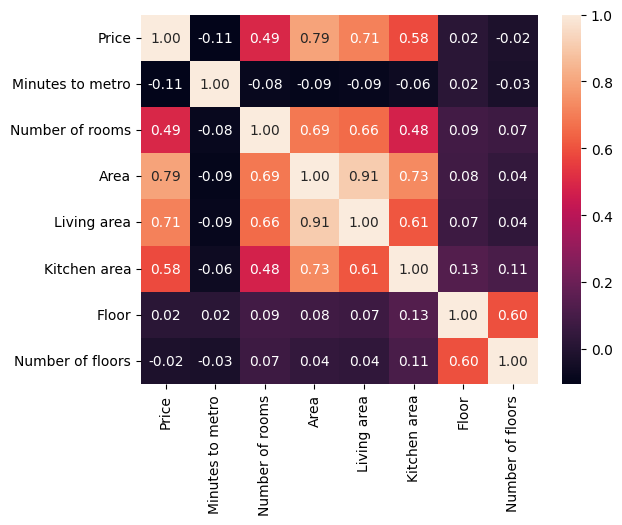

In [79]:
import seaborn as sns
sns.heatmap(df[data].corr(method='pearson'), annot=True, fmt='.2f')

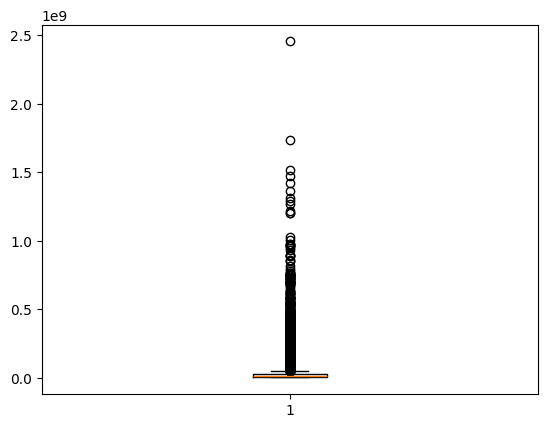

In [80]:
plt.boxplot(df['Price'])
plt.show()

In [81]:
df[data].describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [87]:
#Remove outliers#
low, high = df['Price'].quantile([0.1, 0.9])
df['Pricing'] = df['Price'].between(low, high)
features = ['Pricing', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area','Kitchen area', 'Floor', 'Number of floors']
data = features.copy()
features

['Pricing',
 'Minutes to metro',
 'Number of rooms',
 'Area',
 'Living area',
 'Kitchen area',
 'Floor',
 'Number of floors']

In [83]:
df[data].describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [84]:
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [120]:
#Train our data#
X = df[['Area', 'Living area']]
y = df['Pricing']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
#Metrics Libraries##
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
y_mean = y_train.mean()
y_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_baseline)
r2_score_baseline = r2_score(y_train, y_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_baseline))
print('mae_baseline:', round(mae_baseline, 2))
print('r2_score_baseline:', round(r2_score_baseline, 2))
print('rmse_baseline:', round(rmse_baseline, 2))

mae_baseline: 0.32
r2_score_baseline: 0.0
rmse_baseline: 0.4


In [122]:
#Build the model#
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
#train our model#
y_pred_training = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_training)
r2_score_train = r2_score(y_train, y_pred_training)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_training))
print('mae_train:', round(mae_train, 2))
print('r2_score_train:', round(r2_score_train, 2))
print('rmse_train:', round(rmse_train, 2))

mae_train: 0.27
r2_score_train: 0.15
rmse_train: 0.37


In [124]:
#Test our model#
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('mae_test:', round(mae_test, 2))
print('r2_score_test:', round(r2_score_test, 2))
print('rmse_test:', round(rmse_test, 2))

mae_test: 0.28
r2_score_test: 0.12
rmse_test: 0.38


In [135]:
def make_prediction(Area, Living_area):
  word={'Area': Area, 'Living area': Living_area}
  df = pd.DataFrame(word, index=[0])
  word = model.predict(df).round(2)
  return f'predicted prices $ {word}'
  word = model.predict(df). round(2)
  return f'predicted prices $ {word}'





In [139]:
 make_prediction(23.1, 40.5)


'predicted prices $ [0.92]'